In [1]:
import keras
keras.__version__

'2.4.3'

# Clustering/Classification toy example 과제_17101971 이예빈

## 1. 이진 분류 - IMDB영화 리뷰 긍/부정 분류
### 1.1. 데이터 셋 로드 & 살펴보기

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)   # 데이터에서 자주 나오는 단어 10,000개만 사용

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# 리뷰데이터 원래 영어 단어로 디코딩

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 1.2. 데이터 준비 - 원핫인코딩

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 1.3. 모델 구현

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 1.4. 훈련 검증

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5298 - accuracy: 0.7796 - val_loss: 0.4039 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3210 - accuracy: 0.8993 - val_loss: 0.3345 - val_accuracy: 0.8691
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2314 - accuracy: 0.9245 - val_loss: 0.2837 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1816 - accuracy: 0.9399 - val_loss: 0.2823 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1489 - accuracy: 0.9520 - val_loss: 0.2815 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1261 - accuracy: 0.9601 - val_loss: 0.2886 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1019 - accuracy: 0.9700 - val_loss: 0.3117 - val_accuracy: 0.8850
Epoch 8/20
30/30 

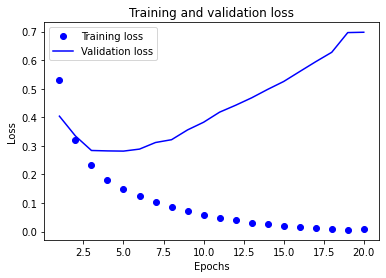

In [14]:
import matplotlib.pyplot as plt
#loss 그래프 그리기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

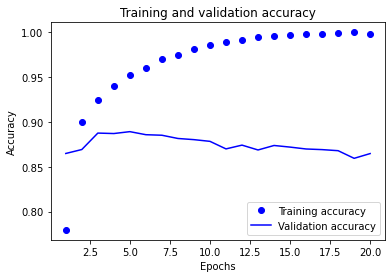

In [15]:
#accuracy 그래프 그리기
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

3번째 에폭 이후 훈련 중지 -> 4번만 훈련 후 평가

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 7ms/step - loss: 0.4564 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1983 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 1s 649us/step - loss: 0.2920 - accuracy: 0.8854


In [17]:
results

[0.2919566035270691, 0.8853600025177002]

In [18]:
# 새로운 데이터 예측
model.predict(x_test)

array([[0.19703645],
       [0.9998441 ],
       [0.8575779 ],
       ...,
       [0.1368995 ],
       [0.07735628],
       [0.6549057 ]], dtype=float32)

## 2. 이진 분류 - 감성분석(문장 극성 계산하기)
### 2.1. Vader method 사용

In [19]:
from pprint import pprint
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
        "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
        "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
        "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
        "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
        "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
        "The book was good.",         # positive sentence
        "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
        "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
        "A really bad, horrible book.",       # negative sentence with booster words
        "At least it isn't a horrible book.", # negated negative sentence with contraction
        ":) and :D",     # emoticons handled
        "",              # an empty string is correctly handled
        "Today sux",     #  negative slang handled
        "Today sux!",    #  negative slang with punctuation emphasis handled
        "Today SUX!",    #  negative slang with capitalization emphasis
        "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
        "Today kinda sux! But I'll get by, lol"]

In [21]:
paragraph = "It was one of the worst movies I've seen, despite good reviews. \
Unbelievably bad acting!! Poor direction. VERY poor production. \
The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

lines_list = nltk.tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)

In [22]:
tricky_sentences = [
    "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
    under orders and in the ''least offensive way possible.''"]
sentences.extend(tricky_sentences)

In [23]:
pprint(sentences)

['VADER is smart, handsome, and funny.',
 'VADER is smart, handsome, and funny!',
 'VADER is very smart, handsome, and funny.',
 'VADER is VERY SMART, handsome, and FUNNY.',
 'VADER is VERY SMART, handsome, and FUNNY!!!',
 'VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!',
 'The book was good.',
 'The book was kind of good.',
 'The plot was good, but the characters are uncompelling and the dialog is not '
 'great.',
 'A really bad, horrible book.',
 "At least it isn't a horrible book.",
 ':) and :D',
 '',
 'Today sux',
 'Today sux!',
 'Today SUX!',
 "Today kinda sux! But I'll get by, lolToday kinda sux! But I'll get by, lol",
 "It was one of the worst movies I've seen, despite good reviews.",
 'Unbelievably bad acting!!',
 'Poor direction.',
 'VERY poor production.',
 'The movie was bad.',
 'Very bad movie.',
 'VERY bad movie.',
 'VERY BAD movie.',
 'VERY BAD movie!',
 'Most automated sentiment analysis tools are shit.',
 'VADER sentiment analysis is the shit.',
 'Sentime

In [24]:
import nltk
nltk.download('vader_lexicon')
nltk.download('movie_reviews')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yebin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\yebin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [25]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):         
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print("\n===================\n")

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 

VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 

VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 

VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 

VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 

VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 

The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 

The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 

The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 

A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 

At least it isn't a horrible book

### 2.2. textblob 사용 - PatternAnalyzer

In [26]:
from textblob import TextBlob

In [27]:
text = '''
These laptops are horrible but I've seen worse. How about lunch today? The food was okay.
'''

blob = TextBlob(text)
for sentence in blob.sentences:
    print(sentence)
    print(sentence.sentiment)
    print("=================\n")


These laptops are horrible but I've seen worse.
Sentiment(polarity=-0.7, subjectivity=0.8)

How about lunch today?
Sentiment(polarity=0.0, subjectivity=0.0)

The food was okay.
Sentiment(polarity=0.5, subjectivity=0.5)



In [28]:
for sentence in sentences:
    print(sentence)
    blob = TextBlob(sentence)
    print(blob.sentiment)
    print("Polarity: ", blob.sentiment.polarity)
    print("=========================================\n")

VADER is smart, handsome, and funny.
Sentiment(polarity=0.32142857142857145, subjectivity=0.8809523809523809)
Polarity:  0.32142857142857145

VADER is smart, handsome, and funny!
Sentiment(polarity=0.3422619047619048, subjectivity=0.8809523809523809)
Polarity:  0.3422619047619048

VADER is very smart, handsome, and funny.
Sentiment(polarity=0.3428571428571428, subjectivity=0.9452380952380953)
Polarity:  0.3428571428571428

VADER is VERY SMART, handsome, and FUNNY.
Sentiment(polarity=0.3428571428571428, subjectivity=0.9452380952380953)
Polarity:  0.3428571428571428

VADER is VERY SMART, handsome, and FUNNY!!!
Sentiment(polarity=0.4222842261904762, subjectivity=0.9452380952380953)
Polarity:  0.4222842261904762

VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
Sentiment(polarity=0.4222842261904762, subjectivity=0.9452380952380953)
Polarity:  0.4222842261904762

The book was good.
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Polarity:  0.7

The book was kind of goo

### 2.3. textblob 사용 - Naive Bayesian Analyzer

In [29]:
from textblob.sentiments import NaiveBayesAnalyzer

for sentence in sentences:
    print(sentence)
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    print(blob.sentiment)
    print("=========================================\n")

VADER is smart, handsome, and funny.
Sentiment(classification='pos', p_pos=0.9124621404367745, p_neg=0.08753785956322577)

VADER is smart, handsome, and funny!
Sentiment(classification='pos', p_pos=0.9124621404367745, p_neg=0.08753785956322577)

VADER is very smart, handsome, and funny.
Sentiment(classification='pos', p_pos=0.9272761797288727, p_neg=0.07272382027112627)

VADER is VERY SMART, handsome, and FUNNY.
Sentiment(classification='pos', p_pos=0.9272761797288727, p_neg=0.07272382027112627)

VADER is VERY SMART, handsome, and FUNNY!!!
Sentiment(classification='pos', p_pos=0.9272761797288727, p_neg=0.07272382027112627)

VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
Sentiment(classification='pos', p_pos=0.92143155250851, p_neg=0.07856844749148877)

The book was good.
Sentiment(classification='pos', p_pos=0.5026103160733181, p_neg=0.49738968392668215)

The book was kind of good.
Sentiment(classification='pos', p_pos=0.519474356173804, p_neg=0.48052564382619584)

The p

## 3. 다중 분류 - 로이터 뉴스 기사 분류
### 3.1. 데이터 셋 로드 & 살펴보기

In [30]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # 데이터에서 자주 나오는 단어 10,000개만 사용

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [32]:
# 데이터 원래 단어로 디코딩

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [33]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 3.2. 데이터 준비 - 원핫인코딩

In [34]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [35]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.3. 모델 구현

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [37]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.4. 훈련 검증

In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 2.6846 - accuracy: 0.4927 - val_loss: 1.7533 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4069 - accuracy: 0.7078 - val_loss: 1.3017 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0284 - accuracy: 0.7734 - val_loss: 1.1182 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8041 - accuracy: 0.8261 - val_loss: 1.0295 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6388 - accuracy: 0.8687 - val_loss: 0.9616 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5129 - accuracy: 0.8950 - val_loss: 0.9431 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4151 - accuracy: 0.9128 - val_loss: 0.8947 - val_accuracy: 0.8080
Epoch 8/20
16

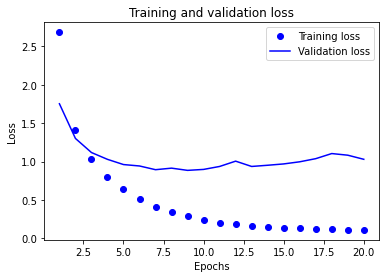

In [40]:
import matplotlib.pyplot as plt
#loss 그래프 그리기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

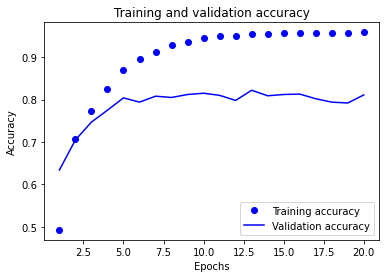

In [41]:
#accuracy 그래프 그리기
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

8번째 에폭 이후 훈련 중지 -> 9번만 훈련 후 평가

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 18ms/step - loss: 2.5579 - accuracy: 0.5008 - val_loss: 1.7175 - val_accuracy: 0.6390
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4213 - accuracy: 0.6953 - val_loss: 1.3596 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0728 - accuracy: 0.7650 - val_loss: 1.1639 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8554 - accuracy: 0.8181 - val_loss: 1.0810 - val_accuracy: 0.7580
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6823 - accuracy: 0.8563 - val_loss: 1.0188 - val_accuracy: 0.7760
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5550 - accuracy: 0.8841 - val_loss: 0.9635 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4449 - accuracy: 0.9072 - val_loss: 0.9602 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

In [43]:
results

[1.0308005809783936, 0.784060537815094]

In [44]:
# 새로운 데이터 예측
predictions = model.predict(x_test)
np.argmax(predictions[0]) # 벡터에서 가장 큰 값이 예측 클래스

4

## 4. Text Clustering - 연합뉴스 기사
### 4.1. TF-IDF 벡터 만들기

In [45]:
from konlpy.tag import Hannanum
from pprint import pprint
import nltk
from konlpy.tag import Okt
import pandas as pd

In [46]:
## 연합뉴스 로딩
kor_corpus = pd.read_csv('news_koreanwave.csv', encoding='utf-8')
kor_corpus.head()

,time,title,contents
0,2016/08/09 16:44,에스테틱 미용 시장 개척하는 광주 노아 메디컬,(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척...
1,2016/08/09 15:37,청소년 노래·춤 경연 'LG드림페스티벌'…총상금 5천만원,(구미=연합뉴스) 박순기 기자 = 노래·춤 경연으로 청소년 꿈과 열정을 키워주는 '...
2,2016/08/09 15:32,"고신대병원, 카자흐스탄에 두 번째 거점센터",(부산=연합뉴스) 박창수 기자 = 고신대 복음병원은 카자흐스탄 제2 도시 알마티에 ...
3,2016/08/09 15:19,국제패션문화페스티벌 자원봉사자 모집,(대구=연합뉴스) 한국패션문화산업진흥원은 2016 대구국제패션문화페스티벌 자원봉사...
4,2016/08/09 14:42,"""中한류 일정 대부분 정상 진행…좋은 콘텐츠로 다가가야""",(세종=연합뉴스) 김영만 기자 = 한국의 고고도 미사일 방어체계(THAAD·사드) ...


In [47]:
## Twitter 형태소 분석기를 이용한 뉴스기사 정제
pos_tagger = Okt()

# 한글 문서 명사만 뽑아서 tf-idf
stopword = ['것','수','저']
total_news = []
for news in kor_corpus['contents'].head():
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [48]:
total_news

['광주 연합뉴스 여운 창 기자 날로 피부 미용 분야 에스테 시장 개척 광주 지역 업체 눈길 끌 노아 컬 설립 에스테 기업 에스테 화장품 미용 기기 건강 기기 식품 등 제품군 보유 액 추물 사용 캐비어 앰플 태반 앰플 셀룰라이트 오일 카페인 성분 함유 다이어트 용 슬 리밍 크림 등 호응 전체 기사 본문 배너 노아 컬 전 화장품 회사 근무 이한수 대표 프랑스 화장품 단일 브랜드 취급 사업 초기 박대 투자 실패 현재 개 제품 브랜드 직접 제조 유통 자산 규모 연매출 견실 중소기업 광주 전남 지역 에스테 분야 현재 여종 관련 분야 특허 외 의장 등록 상표 등록 보유 지역 업체 선도 개발 테라 피 션 시장 반응 업체 설명 전통 온돌방 착안 테라 신체 물리 순환 시스템 해 복부 지방 분해 몸 독소 제거 효과 션 기도 세라믹 코팅 접목 기존 일반 션기 음이온 발생 원적외선 기능 노아 컬 지역 대학 협의 다음 달 신제품 출시 기존 제품 중국 시장 진출 계획 이한수 대표 광주 상의 제품 브리핑 국내 에스테 시장 세계 시장 영역 에스테 한류 문화 고 말',
 '구미 연합뉴스 박순 기 기자 노래 춤 경연 청소년 꿈 열정 제 드림 페스티벌 이 시작 경북 협의 회 내달 홈페이지 신청 행사 전체 기사 본문 배너 가요 그룹 댄스 국악 등 개 부문 진행 부분 별 대상 금 은상 동상 수여 총상 금은 경북 협의 회장 여성가족부 장관 경북 도지사 경북 교육감 구미시장 세 세 누구 참가 가요 그룹 댄스 부문 경우 내달 서울 지역 예선 서울 경향 아트 힐 부산 지역 예선 부산 디자인 센터 구미 지역 예선 경운대 학교 이 각각 린다 본선 팀 선발 뒤 구미 시민운동 행사 대상 팀 선정 국악 부문 구미 경운대 당일 행사 진행 드림 페스티벌 통해 의 김태우 십센치 의 권정열 한류 스타 황 치열 팝핀 여제 민정 트로트 가수 류 원정 등 스타 발굴 내용 홈페이지 사무국 문의',
 '부산 연합뉴스 박창수 기자 고신대 복음병원 카자흐스탄 제 도시 알마티 수도 아스타나 두 거점 센터 마련 고신대 병원 알마티 헬

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

kor_vectorizer = CountVectorizer(min_df=1) # 등장하는 단어들에 대한 오브젝트
kor_bow = kor_vectorizer.fit_transform(total_news) # 딕셔너리에 실제 단어들을 입력
print(kor_bow)

  (0, 31)	4
  (0, 207)	1
  (0, 202)	1
  (0, 56)	1
  (0, 64)	1
  (0, 337)	1
  (0, 108)	2
  (0, 136)	3
  (0, 199)	6
  (0, 179)	5
  (0, 6)	1
  (0, 283)	4
  (0, 198)	3
  (0, 71)	1
  (0, 69)	3
  (0, 157)	1
  (0, 55)	1
  (0, 352)	3
  (0, 50)	2
  (0, 8)	1
  (0, 180)	1
  (0, 272)	1
  (0, 127)	2
  (0, 304)	1
  (0, 145)	1
  :	:
  (4, 261)	1
  (4, 32)	1
  (4, 181)	1
  (4, 40)	1
  (4, 197)	1
  (4, 285)	1
  (4, 205)	2
  (4, 195)	2
  (4, 137)	1
  (4, 47)	1
  (4, 248)	1
  (4, 250)	1
  (4, 273)	1
  (4, 78)	1
  (4, 309)	1
  (4, 267)	1
  (4, 62)	1
  (4, 310)	1
  (4, 17)	1
  (4, 88)	1
  (4, 24)	1
  (4, 260)	1
  (4, 109)	1
  (4, 80)	1
  (4, 354)	1


In [50]:
print(kor_vectorizer.get_feature_names())
# bag-of-words
print(kor_bow.shape)
print(kor_bow.toarray())

['가수', '가요', '각각', '강조', '개발', '개정', '개척', '거점', '건강', '검진', '견실', '견지해', '결정', '경북', '경연', '경우', '경운대', '경쟁', '경제', '경향', '계획', '고고', '고신대', '공간', '공공', '공연장', '공유', '과거', '관계자', '관련', '광부', '광주', '교류', '교육', '교육감', '구미', '구미시장', '구축', '국내', '국립병원', '국민', '국악', '국제', '권정열', '규모', '그룹', '극장', '극히', '근무', '금은', '기기', '기능', '기도', '기사', '기술', '기업', '기자', '기존', '기타', '기획', '김영만', '김태우', '끼리', '나라', '날로', '내년', '내달', '내용', '노래', '노아', '누구', '눈길', '다음', '다이어트', '단일', '담당', '당일', '대구', '대부분', '대상', '대중', '대표', '대학', '대한', '대해', '댄스', '더욱', '도시', '도움', '도지사', '독소', '동상', '드림', '등록', '디자이너', '디자인', '라며', '리밍', '린다', '마련', '메시지', '모집', '몽골', '문의', '문화', '물리', '미래', '미사일', '미용', '민간', '민정', '박대', '박순', '박창수', '반복', '반응', '발굴', '발급', '발생', '발전', '방어', '배너', '배치', '번역', '베트남', '병원', '보도', '보유', '복부', '복음병원', '본문', '본선', '봉사', '부문', '부분', '부산', '분야', '분위기', '분해', '브랜드', '브리핑', '사드', '사립', '사무국', '사업', '사용', '사흘', '산업', '상의', '상표', '생각', '생산', '서로', '서울', '선도', '선발', '선정', '설립', '설명', '성공', '성분', '성인

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer() # tfidf 변환 인스턴스 생성
tfidf = transformer.fit_transform(kor_bow.toarray())

In [52]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.06347707, 0.        ,
        0.06347707],
       [0.07951321, 0.15902641, 0.06415076, ..., 0.        , 0.07951321,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05029333, ..., 0.        , 0.        ,
        0.        ]])

### 4.2. 유사 문서 검색

In [53]:
yonhap = kor_corpus['contents']

In [54]:
import re

total_news = []
stopword = ['것','수','저']

for news in yonhap[:1000]:
    pos_news = re.sub('.* 기자 = ', '', news) # 한 기자가 많은 기사를 작성. 기자명 때문에 유사한 것으로 계산될 수 있으니 이를 제거
    pos_news = ['/'.join(t[:-1]) for t in pos_tagger.pos(pos_news) if ((t[1]=='Noun') & (t[0] not in stopword))]
    total_news.append(' '.join(pos_news))

In [55]:
kor_vectorizer = CountVectorizer(min_df=10)
kor_bow = kor_vectorizer.fit_transform(total_news)

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(kor_bow[0], kor_bow)

array([[1.        , 0.12173486, 0.06030633, 0.06818622, 0.16158773,
        0.10640966, 0.0758098 , 0.16440813, 0.04298012, 0.10527936,
        0.11098767, 0.08508637, 0.05065256, 0.10504686, 0.05860255,
        0.10252877, 0.13108813, 0.20904061, 0.18142591, 0.06008639,
        0.08061022, 0.4265352 , 0.12486552, 0.08023511, 0.0764091 ,
        0.0953109 , 0.06859413, 0.11930941, 0.08662264, 0.11129395,
        0.06113981, 0.12393213, 0.04990412, 0.05792563, 0.06057372,
        0.0796005 , 0.08456161, 0.14001477, 0.05835841, 0.07177136,
        0.14522525, 0.04548588, 0.09271934, 0.11080271, 0.09701017,
        0.18128431, 0.11371471, 0.12113809, 0.09403049, 0.10787924,
        0.07498126, 0.09475421, 0.12143068, 0.13243743, 0.08161283,
        0.11089333, 0.06384337, 0.20147507, 0.09319733, 0.07407103,
        0.09649767, 0.12467216, 0.1044966 , 0.07657052, 0.08213785,
        0.11760737, 0.09903127, 0.14698795, 0.13397784, 0.28123236,
        0.10296484, 0.27624495, 0.05792305, 0.10

In [57]:
(-cosine_similarity(kor_bow[0], kor_bow)).argsort()

array([[  0,  21, 604, 503, 883, 440, 498, 196, 723, 172, 416, 552, 685,
        877, 393, 740, 895, 264, 309,  69,  71, 417, 463, 770, 222, 287,
        369, 272, 487, 594, 271, 680, 737, 733,  97,  91, 671, 917, 232,
        800, 267, 587, 187, 349, 806, 712, 628, 261, 506, 553, 497, 363,
        665, 305, 891, 753, 427, 768, 964, 525, 471, 280, 933, 386, 676,
        850, 160, 765, 283, 682, 675, 849, 785, 228, 230, 154, 970,  17,
        747, 268, 161, 203, 642, 243, 554, 629, 906,  57, 724, 551, 643,
        491, 926, 492, 661, 184, 511, 759, 713, 958, 320, 882, 946, 382,
        687, 876, 202, 447, 752, 931, 560, 496, 389, 957, 255, 201, 634,
        360, 457, 567, 677, 558, 273, 218, 719, 973,  18,  45, 379, 582,
        708, 175, 584, 871, 532, 585, 887, 617, 916, 911, 913, 355, 938,
        354, 475, 215, 951, 306, 269, 907, 147, 784, 177, 884, 489, 181,
        779, 136, 997, 129, 144,   7, 343, 352, 975,  85, 337,   4, 823,
         99, 460, 683, 242, 104, 490, 426, 189, 376

In [58]:
idx = (-cosine_similarity(kor_bow[0], kor_bow)[0]).argsort()
print(idx)

[  0  21 604 503 883 440 498 196 723 172 416 552 685 877 393 740 895 264
 309  69  71 417 463 770 222 287 369 272 487 594 271 680 737 733  97  91
 671 917 232 800 267 587 187 349 806 712 628 261 506 553 497 363 665 305
 891 753 427 768 964 525 471 280 933 386 676 850 160 765 283 682 675 849
 785 228 230 154 970  17 747 268 161 203 642 243 554 629 906  57 724 551
 643 491 926 492 661 184 511 759 713 958 320 882 946 382 687 876 202 447
 752 931 560 496 389 957 255 201 634 360 457 567 677 558 273 218 719 973
  18  45 379 582 708 175 584 871 532 585 887 617 916 911 913 355 938 354
 475 215 951 306 269 907 147 784 177 884 489 181 779 136 997 129 144   7
 343 352 975  85 337   4 823  99 460 683 242 104 490 426 189 376 974 405
 388 515 942 641 912 378 778 472 788 274 128 493 346 890 944 149 152 356
 864 624 536 134 648 289 873 420 290  67 994 780 178 336 889  40 614 234
 365 572 711 456 739 561 763 610 530 302 125 270 736 291 971 573  37 881
 259 213 844 399 959 481 444 904 167 987 742 855  8

In [59]:
# idx에서 자기 자신을 뺀 두번째 index 즉 idx[1] 리턴! // 이전까지는 intuition
def find_most_similar_news(index, bow, corpus):
    idx = (-cosine_similarity(bow[index], bow)[0]).argsort()[1]
    return corpus[idx]

In [60]:
# 이제부터 시작!
idx = 300

In [61]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [62]:
find_most_similar_news(idx, kor_bow, yonhap) # Query를 제외하고 가장 유사한 문서, 북한이라는 키워드는 없다

'(서울=연합뉴스) 조민정 기자 = "준, 앞을 봐야 하지 않아?" 운전하면서도 조수석에 앉은 자신을 쳐다보며 이야기를 이어가는 남자 주인공에게 타박이 날아든다. 박준이라는 이름의 이 남자 주인공은 재벌 2세. 회사를 물려받는 대신 레스토랑을 연 셰프다. 레스토랑의 여자 매니저는 그와 그의 재산을 탐내며 곁을 맴돌고 부주방장 서연은 그를 짝사랑한다. 전체기사 본문배너 한국 드라마에 빠진 한 백인 소녀가 가상의 세계 \'드라마월드\'에 떨어지면서 벌어지는 이야기를 담은 이 드라마는 곳곳에 한국 드라마의 전형적인 설정들을 재치있게 엮어냈다. 지난 1일부터 한국에서도 볼 수 있게 된 이 미국 드라마에서 \'김치싸대기\', 삼겹살과 소주, 욕심 많은 사모님, 노골적인 간접광고(PPL)까지 익숙한 장면들을 찾아보는 재미가 쏠쏠하다. ◇ "저 자동차 로고는 왜 가린 거야?" 주인공 박준(션 리처드 분)이 화가 났다는 것은 그가 상의 탈의를 하고 샤워기 아래서 뜨거운 물을 맞는 장면으로 드러나고, 차를 타고 가다가 화가 났을 땐 길 한가운데서 상대방에게 낮고 굵은 목소리로 "내려. 내리라고"라 한다. 준의 어머니는 아들이 회사를 이었으면 하는 바람으로 사사건건 간섭을 한다. 그런 그녀 옆에는 \'예비 며느리\'를 자처하는 여자가 있는데, 물론 악녀다. 여주인공 서연(배누리)은 설거지 담당부터 시작해 뛰어난 실력과 미모로 준의 마음을 사로잡아 그를 바로 옆에서 보조하게 됐다. 순수하고 남자를 일부러 꼬시는 일 따위는 할 줄 모른다. 준의 아버지가 운영하던 회사인 \'서리꽃\'의 제품들은 시도 때도 없이 등장해 클로즈업되는 반면, 준이 탄 자동차의 로고는 가려져 있다. 한국 드라마에 과도하게 등장하는 간접광고(PPL)에 대한 패러디다. 급기야 아침 드라마에서 등장해 한동안 화제가 됐던 \'김치 싸대기\' 장면도 \'깨알같이\' 패러디됐다. 누구나 \'뻔하다\'고 생각할만한 설정들을 보란 듯이 노골적으로 드러내 한국 드라마를 단 몇 번이라도 본 사람이라면 피식피식 웃음이 새어 

In [63]:
# TF IDF weighting을 사용하면 더 정확하게 유사한 문서를 찾을 수 있다
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(kor_bow.toarray())

In [64]:
def find_most_similar_news_idf(index, tfidf, corpus):
    idx = (-cosine_similarity(tfidf[index], tfidf)[0]).argsort()[1]
    return corpus[idx]

In [65]:
yonhap[idx]

'(서울=연합뉴스) 곽명일 기자 = 북한당국이 주민을 상대로 자본주의 문화에 대한 단속과 통제를 강화하고 있지만, \'태양의 후예\'와 같은 한국 드라마를 몰래 시청하는 북한 주민들이 많다고 북한 전문매체인 데일리NK가 4일 보도했다. 평안남도 소식통은 이 매체에 "최근 젊은 청년들 속에서 \'태양의 후예\'라는 한국 드라마가 인기를 끌면서 날이 새는 줄도 모르고 시청하고 있다"면서 "이 드라마에 대한 소문이 퍼지자 어른·아이 할 것 없이 너도나도 (드라마를) 보기 위해 애쓰고 있는 상황"이라고 전했다. 소식통은 이어 "시장에서 상인들에게 다가가 \'아랫동네\'(한국)것이 없느냐\'고 슬쩍 말을 건네면 대뜸 \'태양의 후예\'를 소개한다"며 "새 드라마 원본(CD)은 5만 원(한국 돈 7천 원)에 판매되고, 복사본은 그 절반 값에 거래된다"고 설명했다. 전체기사 본문배너 그러면서 "(주민들은)\'200일 전투\'의 쌓인 피로를 한국 드라마를 시청하거나 가요를 감상하면서 해소한다"며 "한류의 확산으로 볼거리가 없는 조선중앙TV를 외면하는 주민이 늘어나고 있다"고 덧붙였다. 앞서 이 매체는 북한당국이 중국산 노트텔(EVD 플레이어)을 남한 드라마 시청의 주요 수단으로 지목하면서 수입을 전면 금지하는 지시를 내렸다고 지난달 23일 보도한 바 있다.'

In [66]:
find_most_similar_news_idf(idx, tfidf, yonhap) # 가운데 일치하는 내용이 있다

'(하노이=연합뉴스) 김문성 특파원 = 배정호 민주평화통일자문회의 사무처장은 27일 "북한의 전통적인 우방국이자 여전히 정치, 경제, 군사적 교류를 이어가는 베트남의 대북제재 이행은 북한의 태도변화에 큰 전환점이 될 수 있다"며 베트남의 적극적인 제재 동참을 촉구했다. 배 사무처장은 이날 베트남 하노이 롯데호텔에서 민주평통 주최로 열린 \'2016 한·베트남 평화통일포럼\'에서 기조연설을 통해 "유엔 제재가 빈틈없이 이행되도록 한국과 베트남이 적극적으로 협력하는 것이 무엇보다 필요하다"고 강조했다. 그는 "2014년 북한과 베트남이 500만 달러(57억 원)의 투자와 교역을 진행했고 베트남에 북한 식당도 운영되고 있다"며 북한의 돈줄을 죄고 비핵화를 이루는데 베트남의 협력을 요청했다. 전체기사 본문배너 강동완 동아대 교수는 \'한류가 북한사회에 미치는 영향\'이란 주제 발표에서 "최근 북한 내부에서 남한 영화나 드라마가 인기를 누리면서 한류 현상이 확산하고 있다"며 "이는 단순히 한류 전파라는 점 이외에 폐쇄된 북한 체제에 자본주의 요소인 시장을 확대하는 매개체"라고 평가했다. 강 교수는 "시장이 단순히 물물거래의 기능보다는 정보가 유통되고 북한사회의 폐쇄성을 상쇄하는 기능을 지니게 됐다"며 "남한 영상 매체의 확산은 북한에서 지역·계층 간 경계 허물기라는 사회적 현상의 변화를 초래하고 있다"고 말했다. 강 교수는 북한 주민의 남한 영상 매체 시청이 북한 체제 변화를 촉구하는 다른 요인과 상호 결합할 경우 북한사회 전체를 움직일 수 있을 기폭제가 될 것으로 전망했다. 딘 꽝 하이 베트남 역사연구소장은 베트남이 1975년 남북통일 이후 중앙에서 지방까지 집중적이고 일관된 정치, 문화, 사회, 경제 통합을 추진했다고 소개하며 전쟁 상흔 치료, 민족 화합과 화해, 미래를 위해 승자와 패자라는 이분법식 인식과 과거 상처에 얽매여서는 안 된다고 지적했다.'

### 4.3. 유사 문서 clustering

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeans = KMeans(n_clusters=5, n_init=50, verbose=1)

In [69]:
kmeans.fit(tfidf)

Initialization complete
Iteration 0, inertia 1759.3799697932247
Iteration 1, inertia 927.329236831634
Iteration 2, inertia 921.659806700876
Iteration 3, inertia 918.6147323238223
Iteration 4, inertia 915.9651127275089
Iteration 5, inertia 912.9257914996597
Iteration 6, inertia 911.606955729034
Iteration 7, inertia 910.7797090977185
Iteration 8, inertia 910.0430628162023
Iteration 9, inertia 909.3220948512128
Iteration 10, inertia 908.9736295962775
Iteration 11, inertia 908.485303720781
Iteration 12, inertia 907.9841208044803
Iteration 13, inertia 907.8266878414822
Iteration 14, inertia 907.6963278091185
Iteration 15, inertia 907.6333243213182
Iteration 16, inertia 907.5839295634288
Iteration 17, inertia 907.5694315307296
Converged at iteration 17: center shift 2.6105143444191197e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1737.5983161410861
Iteration 1, inertia 921.4290698788902
Iteration 2, inertia 916.6067085384068
Iteration 3, inertia 914.

Iteration 21, inertia 908.8164168199843
Converged at iteration 21: center shift 3.568174898354652e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1778.982500550636
Iteration 1, inertia 922.0205656704547
Iteration 2, inertia 917.256519531857
Iteration 3, inertia 915.7872274964623
Iteration 4, inertia 915.3907924190048
Iteration 5, inertia 914.9206133277255
Iteration 6, inertia 913.9811859966874
Iteration 7, inertia 913.1311609614606
Iteration 8, inertia 912.6603498911238
Iteration 9, inertia 912.3226926371809
Iteration 10, inertia 912.1460478924446
Iteration 11, inertia 911.9736309742171
Iteration 12, inertia 911.7597945698916
Iteration 13, inertia 911.688928607349
Iteration 14, inertia 911.6741792674195
Converged at iteration 14: center shift 3.890968585826329e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1732.5135642333205
Iteration 1, inertia 925.6693239449417
Iteration 2, inertia 920.4291058078771
Iter

Iteration 10, inertia 910.6462919769259
Iteration 11, inertia 910.5511714920402
Iteration 12, inertia 910.5348452200096
Converged at iteration 12: center shift 2.3340410118415947e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1769.5618371025705
Iteration 1, inertia 923.925219363677
Iteration 2, inertia 919.0113224945761
Iteration 3, inertia 916.7874668317318
Iteration 4, inertia 915.731683064788
Iteration 5, inertia 915.0364006361408
Iteration 6, inertia 914.635426741241
Iteration 7, inertia 914.336937222195
Iteration 8, inertia 914.1846010735584
Iteration 9, inertia 914.091412825577
Iteration 10, inertia 913.7833732056042
Iteration 11, inertia 913.1075295714439
Iteration 12, inertia 912.4156549982843
Iteration 13, inertia 911.9802732750935
Iteration 14, inertia 911.8766255762835
Iteration 15, inertia 911.8642181925932
Converged at iteration 15: center shift 4.150194477541414e-33 within tolerance 3.860618074647218e-08
Initialization complete
Ite

Iteration 1, inertia 925.8952875379541
Iteration 2, inertia 920.0087051359726
Iteration 3, inertia 917.2772066084399
Iteration 4, inertia 915.7767851076488
Iteration 5, inertia 914.4629062281746
Iteration 6, inertia 913.4419996223914
Iteration 7, inertia 912.8519734417241
Iteration 8, inertia 912.6141707528158
Iteration 9, inertia 912.5850939941718
Iteration 10, inertia 912.5699953369801
Converged at iteration 10: center shift 3.7853856832354713e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1742.9454364769047
Iteration 1, inertia 923.8120013281984
Iteration 2, inertia 918.0878379811392
Iteration 3, inertia 915.3964732928277
Iteration 4, inertia 913.7836671465953
Iteration 5, inertia 913.1791347900809
Iteration 6, inertia 912.9642026864275
Iteration 7, inertia 912.7911815831485
Iteration 8, inertia 912.6134727814016
Iteration 9, inertia 912.5085826637022
Iteration 10, inertia 912.4060846617259
Iteration 11, inertia 911.7890101177908
Iteration 12

Iteration 20, inertia 909.4744562886068
Iteration 21, inertia 909.4380955702957
Iteration 22, inertia 909.4025714010768
Iteration 23, inertia 909.3785130874525
Converged at iteration 23: center shift 2.6432048423154875e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1725.3634905783304
Iteration 1, inertia 924.3031836589058
Iteration 2, inertia 919.9166343994846
Iteration 3, inertia 918.0470443144752
Iteration 4, inertia 916.6238426481297
Iteration 5, inertia 916.1231172208124
Iteration 6, inertia 916.004863920356
Iteration 7, inertia 915.9452310127485
Iteration 8, inertia 915.9244756053323
Converged at iteration 8: center shift 4.309247679415301e-33 within tolerance 3.860618074647218e-08
Initialization complete
Iteration 0, inertia 1761.3742745550608
Iteration 1, inertia 927.9839696805798
Iteration 2, inertia 920.9703353550385
Iteration 3, inertia 918.1123125576021
Iteration 4, inertia 916.6093873040679
Iteration 5, inertia 915.3650538836624
Iter

KMeans(n_clusters=5, n_init=50, verbose=1)

In [70]:
kmeans.labels_

array([1, 0, 0, 0, 4, 4, 4, 1, 3, 3, 4, 0, 0, 4, 0, 4, 1, 0, 1, 3, 0, 1,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 0, 0, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 0, 0, 4, 0,
       4, 4, 0, 1, 0, 0, 1, 3, 0, 1, 0, 4, 0, 4, 4, 3, 4, 4, 0, 0, 4, 4,
       0, 2, 4, 3, 4, 0, 4, 4, 0, 4, 0, 3, 0, 0, 3, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       4, 0, 3, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 3, 0, 3, 2, 1, 0, 0, 0,
       0, 1, 1, 3, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 3, 1, 0, 3, 0, 1, 0,
       2, 0, 0, 4, 1, 1, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 4, 3, 0, 3, 0,
       1, 4, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3,

In [71]:
import numpy as np
clusters = []
for i in range(0, kmeans.n_clusters):
    clusters.append(np.where(kmeans.labels_ == i))

In [72]:
clusters

[(array([  1,   2,   3,  11,  12,  14,  17,  20,  22,  32,  34,  41,  63,
          64,  81,  84,  85,  87,  90,  92,  93,  96,  98, 100, 106, 107,
         110, 115, 118, 120, 122, 123, 128, 129, 130, 131, 132, 133, 134,
         135, 136, 138, 139, 141, 142, 143, 145, 147, 148, 149, 150, 151,
         155, 157, 158, 159, 161, 162, 165, 166, 167, 169, 173, 174, 175,
         176, 181, 182, 183, 184, 186, 188, 190, 193, 195, 197, 199, 200,
         207, 210, 212, 214, 217, 218, 219, 220, 225, 227, 229, 231, 233,
         235, 239, 241, 244, 245, 247, 248, 249, 250, 251, 253, 254, 255,
         256, 258, 259, 260, 261, 262, 265, 266, 267, 270, 273, 274, 275,
         276, 280, 282, 284, 285, 286, 290, 291, 292, 293, 296, 297, 299,
         303, 307, 308, 310, 311, 315, 318, 319, 320, 321, 322, 323, 324,
         325, 327, 329, 332, 333, 334, 335, 341, 342, 344, 345, 347, 348,
         350, 351, 354, 357, 359, 361, 362, 364, 365, 366, 368, 371, 374,
         375, 376, 378, 379, 380, 382,

In [76]:
print('4번 클러스터')
print(yonhap[8])
print(yonhap[9])
print(yonhap[19])

4번 클러스터
(서울=연합뉴스) 윤고은 기자 = 한류스타 장근석의 팬클럽이 지난 6~7일 '장근석 생일 기념 나눔 사진전'을 열어 수익금 5천여만 원을 모았다고 홍보사 와이트리컴퍼니가 9일 밝혔다. 수익금은 전액 기부할 예정이다. 장근석의 공식 팬클럽 크리제이가 서울 강남구 청담동의 갤러리에서 개최한 이번 사진전에는 이틀간 1천500여 명이 다녀갔다. 크리제이가 4년째 개최하는 장근석 사진전은 팬들이 찍은 장근석의 사진을 비롯해 각종 팬아트 등으로 꾸며졌다. 전체기사 본문배너 홍보사는 "기록적인 폭염이 맹위를 떨친 날씨였음에도 나눔을 함께 하기 위해 모인 팬들이 질서 정연하게 사진전을 관람하며 성숙한 팬 문화를 선보였다"고 전했다. 이어 "각국에서 모인 기부금과 입장료로 모인 5천여만 원은 전액 어려운 이웃을 위해 쓰일 예정"이라고 밝혔다. 전시회에 참석해 팬들과 조촐하게 생일파티를 가진 장근석은 "지난 1년 동안의 활동과 그때의 기억을 떠올려보게 된 뜻깊은 시간이었다"고 말했다. 한편, 장근석은 오는 18일 시작하는 tvN 예능 '내 귀에 캔디'에 출연한다. 
(서울=연합뉴스) 윤고은 기자 = 한류스타 이광수가 패션 브랜드 버커루의 광고모델로 발탁됐다고 소속사 킹콩엔터테인먼트가 9일 밝혔다. 버커루 측은 "아시아 전역에서 인기 있는 이광수가 버커루와 긍정적인 효과를 끌어낼 수 있을 것이라 여겼다"고 설명했다. 이어 "앞으로 이광수와 함께하는 다양한 프로모션으로 소비자들과 만날 예정"이라고 덧붙였다. 전체기사 본문배너 이광수는 KBS 2TV '마음의 소리'와 tvN '안투라지' 방송을 앞두고 있다.
(서울=연합뉴스) 정아란 기자 = 한류스타 박해진(33)이 데뷔 10년 만에 처음 만들어지는 공식 팬클럽 창단식을 사비로 진행할 계획이다. 소속사 마운틴 무브먼트는 8일 "박해진이 팬들을 사랑하는 마음에서 2천여 명이 참석하는 공식 팬클럽 '클럽진스'(CLUB Jin's) 창단식 비용 전액을 자신이 부담하기로 했다"고 알렸다. 박해진은 지난 4월 데뷔 10주년 기념

-> 한류 스타 관련 클러스터

In [80]:
print('2번 클러스터')
print(yonhap[0])
print(yonhap[7])
print(yonhap[16])

2번 클러스터
(광주=연합뉴스) 여운창 기자 = 날로 커가는 피부·미용분야의 에스테틱 시장을 개척하는 광주지역 업체가 있어 눈길을 끌고 있다. 노아 메디컬은 1993년 설립한 전문에스테틱 기업으로 에스테틱 화장품과 미용기기 건강기기, 식품 등의 다양한 제품군을 보유하고 있다. 특히 원액추물을 사용한 캐비어 앰플과 태반 앰플, 셀룰라이트 오일, 카페인 성분이 함유된 다이어트용 슬리밍 크림 등이 높은 호응을 얻었다. 전체기사 본문배너 노아메디컬은 13년 전 화장품 회사에서 근무하던 이한수 대표가 프랑스 화장품 단일 브랜드를 취급하면서 세웠다. 사업초기 문전박대와 투자실패를 딛고 현재는 50개 제품브랜드를 직접 제조하고 유통하고 있으며 자산규모 15억원, 연매출 5억원의 견실한 중소기업으로 성장했다. 특히 광주전남지역에서는 여전히 생소한 에스테틱 분야에서 현재 10여종이 넘는 관련 분야 특허 외 의장등록, 상표등록을 보유하며 지역 업체를 선도하고 있다. 2013년 개발해 선보인 온열테라피와 온열석션기는 시장 반응도 좋다는 것이 업체의 설명이다. 전통적인 온돌방식에서 착안한 온열테라피는 신체의 물리적 순환시스템을 활발하게 해 복부 지방분해를 돕고 몸의 독소를 제거하는 효과를 거두고 있다. 온열석션기도 세라믹 코팅을 접목해 차갑고 딱딱한 기존 일반 석션기에 비해 음이온 발생과 원적외선 온열기능이 뛰어난 것으로 알려졌다. 노아 메디컬은 지역대학과도 협의해 다음 달에도 신제품을 출시해 기존 제품과 함께 중국시장에도 진출할 계획이다. 이한수 대표는 9일 광주상의에서 열린 제품 브리핑에서 "국내 에스테틱 시장뿐만 아니라 세계 시장으로 영역을 넓혀 에스테틱 한류문화를 이끌고자 한다"고 말했다. 
(서울=연합뉴스) 고은지 기자 = 코트라(KOTRA)는 9일 서울 서초구 사옥에서 박근혜 대통령의 몽골 방문 당시 경제사절단에 참여한 국내기업 등과 후속 간담회를 열었다. 국내기업 54개사는 지난 7월 17일 박 대통령의 순방지인 몽골에서 1대1 상담회를 개최해 약 122억원 규모의 계

-> 중국 관련 클러스터